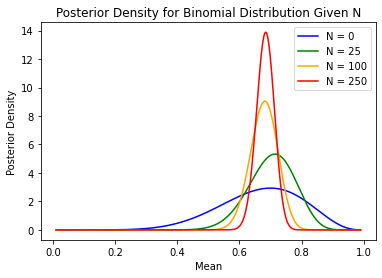

In [1]:
# Danny Hong and Arthur Skok
# Project 1 - Conjugate Priors

# Part 1: Binomial Conjugate Estimation (Using Beta distribution)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import gamma 
from scipy.stats import invgamma 

# Binomial Posterior Density Plot Function
def post_Binom(N, color, p, a0, b0):
    x = np.linspace(0.01, 0.99, 10000)

    # Plot the Prior if N = 0
    if N == 0:
      y = beta.pdf(x, a0, b0)
      plt.plot(x, y, color)

    else:
      data = np.random.binomial(1, p, N) # generating the data vector for a binomial dist

      # Counting the number of heads/tails in the random distribution
      m = 0
      l = 0
      for number in data: 

        if number == 1: # Increasing m by 1 for each head
          m = m + 1

        if number == 0: # Increasing l by 1 for each tail
          l = l + 1
          
      # Updating the parameters
      aN = a0 + m
      bN = b0 + l

      # Using the beta distribution in order to graph posterior density functions
      y = beta.pdf(x, aN, bN)
      plt.plot(x, y, color)

# Mean Square Error function for Binomial Distribution
def MSE_Binom(a0, b0, p, data):
    MSE = np.linspace(0, 249, 250)
    mean = []
    
    # Counting the number of heads/tails in the random distribution
    m = 0
    l = 0
    for N in range(1, 250):

        if (data[N - 1] == 1):
            m = m + 1

        if (data[N - 1] == 0):
            l = l + 1

        #Updating Equations for aN and bN
        aN = a0 + m
        bN = b0 + l
        mean.append(aN/(aN+bN))

        sum = 0
        for i in range(0, N): 
            sum += (mean[i] - p)**2
        
        MSE[N] = ((1/N)*sum)

    return MSE

# Max Likelihood Function for Binomial Distribution
def ML_Binom(data, p):
    ML = np.linspace(0, 249, 250)
    likelihood = []

    m = 0
    for N in range(1, 250):
        if (data[N - 1] == 1):
            m = m + 1

        likelihood.append(m/N)

        sum = 0
        for i in range(0, N): 
            sum = sum + (likelihood[i] - p)**2
        
        ML[N] = ((1/N)*sum)

    return ML
      
# Estimating probabilities (Figure 2.2d hyperparameters)
a0 = 8
b0 = 4
p = a0/(a0 + b0)

plt.figure()
plt.title("Posterior Density for Binomial Distribution Given N")
plt.xlabel("Mean")
plt.ylabel("Posterior Density")

# Plotting the Beta Posteriors for N = 0, N = 25, N = 100, N = 250
post_Binom(0, 'blue', p, a0, b0)
post_Binom(25, 'green', p, a0, b0)
post_Binom(100, 'orange', p, a0, b0)
post_Binom(250, 'red', p, a0, b0)

plt.legend(["N = 0", "N = 25", "N = 100", "N = 250"])

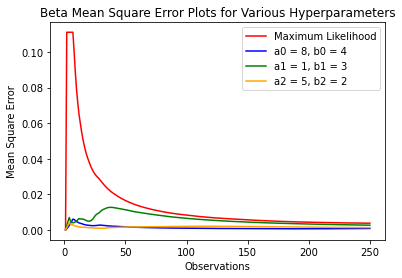

In [2]:
#Plotting the MSE and ML Plots

#Plotting the first set of Hyperparameters MSE and ML Plots
plt.figure()
plt.title("Beta Mean Square Error Plots for Various Hyperparameters")
plt.xlabel("Observations")
plt.ylabel("Mean Square Error")

observations = np.linspace(1, 250, 250)

data = np.random.binomial(1, p, 250)
ML = ML_Binom(data, p)
MSE1 = MSE_Binom(a0, b0, p, data)

plt.plot(observations, ML, 'red')
plt.plot(observations, MSE1, 'blue')


#Declaring and Plotting the second set of Hyperparameters MSE PLot
a1 = 1
b1 = 3
p1 = a1/(a1 + b1)

data = np.random.binomial(1, p1, 250)
MSE2 = MSE_Binom(a1, b1, p1, data)

plt.plot(observations, MSE2, 'green')


#Declaring and Plotting the third set of Hyperparameters MSE PLot
a2 = 5
b2 = 2
p2 = a2/(a2 + b2)

data = np.random.binomial(1, p2, 250)
MSE3 = MSE_Binom(a2, b2, p2, data)

plt.plot(observations, MSE3, 'orange')

plt.legend(["Maximum Likelihood", "a0 = 8, b0 = 4", "a1 = 1, b1 = 3", "a2 = 5, b2 = 2"])

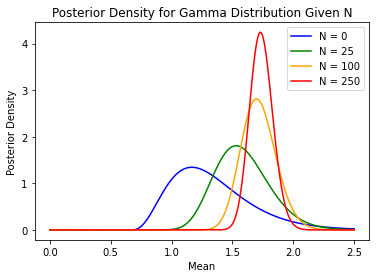

In [3]:
#Part 2: Gaussian with known Mean Conjugate Estimation (Using Gamma distribution)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import gamma 
from scipy.stats import invgamma 

# Gamma Posterior Density Plot Function
def post_Gam(N, color, mean, a0, b0):
    x = np.linspace(0, 2.5, 10000)

    #Plotting the prior if N = 0
    if N == 0:
      y = gamma.pdf(x, a0, mean, 1/b0)
      plt.plot(x, y, color)

    else:
      data = np.random.normal(mean, 1, N) # generating the data vector for a binomial distribution
      aN = a0 + N/2

      total = 0
      for number in data:
        total = total + (number - mean)**2
        bN = b0 + (1/2) * total

      # Using the gamma distribution in order to graph posterior density functions
      y = gamma.pdf(x, aN, mean, 1/bN)
      plt.plot(x, y, color)

# Mean Square Error function for Gamma Distribution
def MSE_Gam(a0, b0, mu, data):   
    MSE = np.linspace(0, 249, 250)
    mean = []
    
    var1 = 0
    for i in range(1, 250):
        var1 = var1 + ((data[i] - mu)**2)

    p = (1/250) * var1
         
    for N in range(1, 250):
        sum = 0
        
        var2 = 0
        for i in range(0, N):
            var2 = var2 + ((data[i] - mu)**2)
        
        #Updating Equations for aN and bN
        aN = a0 + N/2
        bN = b0 + (1/2)*var2

        mean.append(aN/bN)

        for i in range(0, N): 
            sum = sum + ((mean[i] - p)**2)
        
        MSE[N] = ((1/N) * sum)
    
    return MSE

# Max Likelihood function for Gamma Distribution
def ML_Gam(b0, mu, data):   
    ML = np.linspace(0, 249, 250)
    likelihood = []   

    var1 = 0
    for i in range(1, 250):
        var1 = var1 + (data[i] - mu)**2

    p = (1/250) * var1
         
    for N in range(1, 250):
        sum = 0

        var2 = 0
        for i in range(0, N):
            var2 = var2 + (data[i] - mu)**2
        
        bN = b0 + (1/2)*var2

        likelihood.append((bN - b0) * (2/N))

        for i in range(0, N): 
            sum = sum + (likelihood[i] - p)**2
        
        ML[N] = ((1/N) * sum)
    
    return ML

#Declaring the first set of Hyperparameters
a0 = 4
b0 = 6
mean = a0/b0

plt.figure()
plt.title("Posterior Density for Gamma Distribution Given N")
plt.xlabel("Mean")
plt.ylabel("Posterior Density")

# Plotting the Gamma Posteriors for N = 0, N = 25, N = 100, N = 250
post_Gam(0, 'blue', mean, a0, b0)
post_Gam(25, 'green', mean, a0, b0)
post_Gam(100, 'orange', mean, a0, b0)
post_Gam(250, 'red', mean, a0, b0)

plt.legend(["N = 0", "N = 25", "N = 100", "N = 250"])

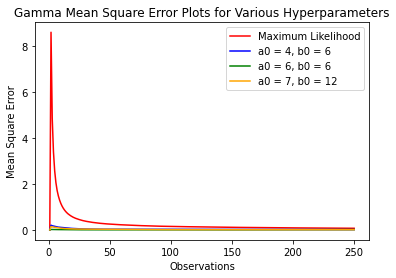

In [8]:
#Plotting MSE And ML PLots for Part 2

#Plotting the first set of Hyperparameters MSE and ML Plots
plt.figure()
plt.title("Gamma Mean Square Error Plots for Various Hyperparameters")
plt.xlabel("Observations")
plt.ylabel("Mean Square Error")

observations = np.linspace(1, 250, 250)

data = np.random.normal(mean, 1, 250)
MSE1 = MSE_Gam(a0, b0, mean, data)
ML1 = ML_Gam(b0, mean, data)

plt.plot(observations, ML1, 'red')
plt.plot(observations, MSE1, 'blue')

#Declaring and plotting the second set of Hyperparameters MSE Plot
a1 = 6
b1 = 6
mean = a1/b1

data = np.random.normal(mean, 1, 250)
MSE2 = MSE_Gam(a1, b1, mean, data)

plt.plot(observations, MSE2, 'green')

#Declaring and plotting the third set of Hyperparameters MSE Plot
a2 = 7
b2 = 12
mean = a2/b2

data = np.random.normal(mean, 1, 250)
MSE3 = MSE_Gam(a2, b2, mean, data)

plt.plot(observations, MSE3, 'orange')

plt.legend(["Maximum Likelihood", "a0 = 4, b0 = 6", "a0 = 6, b0 = 6", "a0 = 7, b0 = 12"])

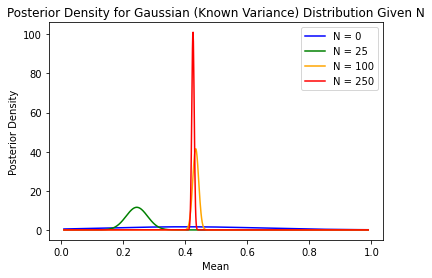

In [11]:
#Part 3: Gaussian with known Variance Conjugate Estimation (Using Normal distribution)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import gamma 
from scipy.stats import invgamma 

# Gaussian (with known variance) Posterior density Plot Function
def post_Gauss(N, color, mu0, var0): 
    x = np.linspace(0.01, 0.99, 1000)  

    #Plotting the prior if N = 0
    if N == 0:
      y = norm.pdf(x, mu0, var0)
      plt.plot(x, y, color)

    else:
      var = 1
      data = np.random.normal(mu0, 1, N) # generating the data vector for a normal distribution

      #Updating Equations for muN and varN
      mean = (1/N) * np.sum(data)
      muN = var/((N * var0) + var) * mu0 + (N * var0)/((N * var0) + var) * mean
      varN = 1/((1/var0) + (N/var))    

      #Using the normal distribution in order to graph posterior density functions
      y = norm.pdf(x, muN, varN)
      plt.plot(x, y, color)

# Function for finding the Mean Square Error
def MSE_Gauss(mu0, var0, data):
    MSE = np.linspace(0, 249, 250)
    mean = []
    var = 1

    p = (1/250) * np.sum(data)

    for N in range(1, 250):
        
        sum1 = 0
        for j in range(0, N):
            sum1 = sum1 + data[j]

        mean1 = sum1/N
        
        #Updating Equations for muN
        muN = var/((N * var0) + var) * mu0 + (N * var0)/((N * var0) + var) * mean1
        mean.append(muN)
        
        sum2 = 0
        for i in range(0, N): 
            sum2 = sum2 + (mean[i] - p)**2
        
        MSE[N] = ((1/N) * sum2)

    return MSE

# Function for finding the Max Likelihood
def ML_Gauss(data):
    ML = np.linspace(0, 249, 250)
    likelihood = []

    p = (1/250) * np.sum(data)

    for N in range(1, 250):

        sum1 = 0
        for j in range(0, N):
            sum1 = sum1 + data[j]

        likelihood.append(sum1/N)

        sum2 = 0
        for i in range(0, N): 
            sum2 = sum2 + (likelihood[i] - p)**2
        
        ML[N] = ((1/N) * sum2)

    return ML 

#Declaring the first set of Hyperparameters
mu0 = 0.4
var0 = 0.25

plt.figure()
plt.title("Posterior Density for Gaussian (Known Variance) Distribution Given N")
plt.xlabel("Mean")
plt.ylabel("Posterior Density")

#Plotting the Gaussian (known variance) posteriors for N = 0, N = 25, N = 100, N = 250
post_Gauss(0, 'blue', mu0, var0)
post_Gauss(25, 'green', mu0, var0)
post_Gauss(100, 'orange', mu0, var0)
post_Gauss(250, 'red', mu0, var0)

plt.legend(["N = 0", "N = 25", "N = 100", "N = 250"])

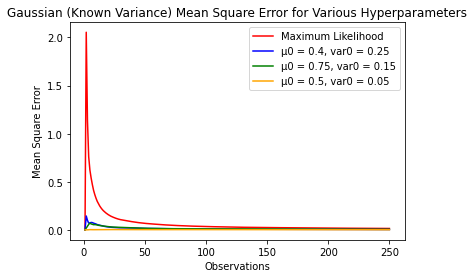

In [12]:
#Plotting the first set of Hyperparameters MSE and ML Plots for Part 3

#Plotting the first set of Hyperparameters MSE and ML Plots
plt.figure()
plt.title("Gaussian (Known Variance) Mean Square Error for Various Hyperparameters")
plt.xlabel("Observations")
plt.ylabel("Mean Square Error")

observations = np.linspace(1, 250, 250)

data = np.random.normal(mu0, 1, 250)
MSE = MSE_Gauss(mu0, var0, data)
MSE2 = ML_Gauss(data)
 
plt.plot(observations, MSE2, 'red')
plt.plot(observations, MSE, 'blue')

#Declaring and plotting the second set of Hyperparameters MSE Plot
mu0 = 0.75
var0 = 0.15
data = np.random.normal(mu0, 1, 250)
MSE = MSE_Gauss(mu0, var0, data)
plt.plot(observations, MSE, 'green')

#Declaring and plotting the third set of Hyperparameters MSE Plot
mu0 = 0.5
var0 = 0.05
data = np.random.normal(mu0, 1, 250)
MSE = MSE_Gauss(mu0, var0, data)
plt.plot(observations, MSE, 'orange')

plt.legend(["Maximum Likelihood", "µ0 = 0.4, var0 = 0.25", "µ0 = 0.75, var0 = 0.15", "µ0 = 0.5, var0 = 0.05"])

In [ ]:
#Summary 

#For this project, three scenarios: Binomial (Using Beta Distribution), 
#Gaussian with Known Mean (Using Gamma Distribution), and Gaussian with Known Variance (Using Normal Distribution)
#were implemented and tested in order to do conjugate prior estimating for various hyperparameters. 
#Max likelihood/Mean squared errors for various hyperparameters were done as well. From plotting the Posterior Density Plots, it can
#be seen that as the number of obervations, N, increases, the peak of the distribution plot will get closer to the actual mean value.
#From plotting the Max likelihood and Mean squared error plots, it's noticed that as the number of observations increases, the errors goes down.
#Additionally, in comparison to the ML estimate, the mean square errors of the conjugate prior estimates are usually lower unless the hyperparameters values
#are set to be really big numbers. Overall, larges hyperparameters would, on average, result in larger mean squared errors.